# kaggle house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
def get_age(x):
    res = x['YrSold'] - x['YearBuilt']
    return res

In [6]:
def get_year_after_remod(x):
    res = x['YrSold'] - x['YearRemodAdd']
    return res

In [7]:
def change_month(mon):
    return str(mon)

In [8]:
df['Age'] = df.apply(get_age, axis = 1)
df['Year_after_remod'] = df.apply(get_year_after_remod, axis = 1)
df['MoSold'] = df['MoSold'].apply(change_month)
df.drop(['YrSold','YearBuilt','YearRemodAdd', 'MoSold'], axis =1, inplace = True)

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Year_after_remod
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,22.950000
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,20.640653
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,41.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000,60.000000


In [10]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Year_after_remod
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.050298,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917,0.012724,0.022049
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284,-0.028746,-0.041968
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799,-0.122848,-0.088417
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014832,-0.014709
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572629,-0.552570
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,0.377325,-0.070931
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493,-0.315562,-0.180183
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.248483,-0.127556
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.050422,0.069814
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.150619,-0.183830


In [11]:
(df.corr()).shape

(36, 36)

In [12]:
cat_col = list(df.corr().columns)

In [13]:
cat_col.pop(0)

'Id'

In [14]:
len(cat_col)

35

:0: FutureWarning: IPython widgets are experimental and may change in the future.


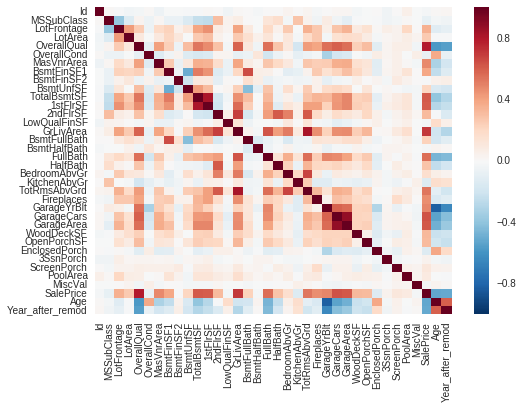

In [15]:
import seaborn as sns; 
ax = sns.heatmap(df.corr())

In [16]:
set(list(df.columns)) - set(cat_col)

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [17]:
real_cat = list(set(list(df.columns)) - set(cat_col))

In [18]:
real_cat.remove("Id")

In [19]:
df[real_cat][:10]

,MasVnrType,LotConfig,GarageQual,Exterior1st,GarageFinish,Electrical,BsmtQual,BsmtExposure,Foundation,GarageType,...,Fence,SaleCondition,ExterCond,ExterQual,Functional,Alley,Street,HouseStyle,MiscFeature,PoolQC
0,BrkFace,Inside,TA,VinylSd,RFn,SBrkr,Gd,No,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,2Story,NaN,NaN
1,None,FR2,TA,MetalSd,RFn,SBrkr,Gd,Gd,CBlock,Attchd,...,NaN,Normal,TA,TA,Typ,NaN,Pave,1Story,NaN,NaN
2,BrkFace,Inside,TA,VinylSd,RFn,SBrkr,Gd,Mn,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,2Story,NaN,NaN
3,None,Corner,TA,Wd Sdng,Unf,SBrkr,TA,No,BrkTil,Detchd,...,NaN,Abnorml,TA,TA,Typ,NaN,Pave,2Story,NaN,NaN
4,BrkFace,FR2,TA,VinylSd,RFn,SBrkr,Gd,Av,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,2Story,NaN,NaN
5,None,Inside,TA,VinylSd,Unf,SBrkr,Gd,No,Wood,Attchd,...,MnPrv,Normal,TA,TA,Typ,NaN,Pave,1.5Fin,Shed,NaN
6,Stone,Inside,TA,VinylSd,RFn,SBrkr,Ex,Av,PConc,Attchd,...,NaN,Normal,TA,Gd,Typ,NaN,Pave,1Story,NaN,NaN
7,Stone,Corner,TA,HdBoard,RFn,SBrkr,Gd,Mn,CBlock,Attchd,...,NaN,Normal,TA,TA,Typ,NaN,Pave,2Story,Shed,NaN
8,None,Inside,Fa,BrkFace,Unf,FuseF,TA,No,BrkTil,Detchd,...,NaN,Abnorml,TA,TA,Min1,NaN,Pave,1.5Fin,NaN,NaN
9,None,Corner,Gd,MetalSd,RFn,SBrkr,TA,No,BrkTil,Attchd,...,NaN,Normal,TA,TA,Typ,NaN,Pave,1.5Unf,NaN,NaN


(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

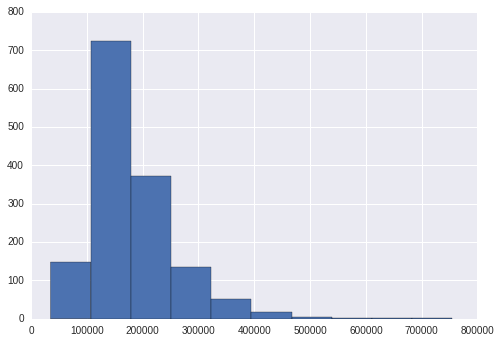

In [20]:
plt.hist(df.SalePrice)

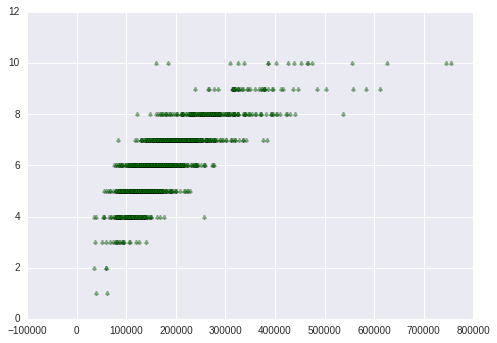

In [21]:
plt.scatter(df.SalePrice, df.OverallQual, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")

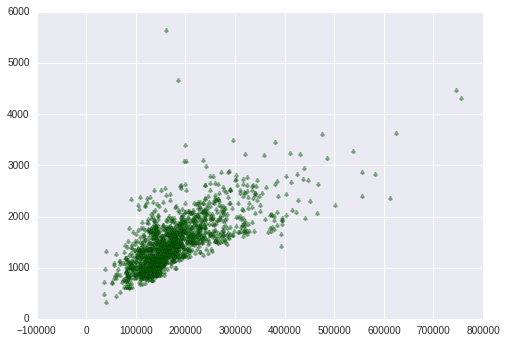

In [22]:
plt.scatter(df.SalePrice, df.GrLivArea, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")

In [23]:
df.shape

(1460, 79)

In [24]:
df = df[df.GrLivArea <4500]

In [25]:
df.shape

(1458, 79)

In [26]:
from sklearn.preprocessing import MinMaxScaler
df.fillna(0, inplace = True)
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df[cat_col] = scaler.fit_transform(df[cat_col])

In [27]:
df.drop('Id',axis =1, inplace = True)

In [28]:
y = df.SalePrice

In [29]:
df.drop('SalePrice', axis =1, inplace = True)

In [30]:
X= pd.get_dummies(df)

In [274]:
for x in made_up2:
    X[x] = 0

In [31]:
X.shape

(1458, 301)

# train validation split

In [32]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print X_train.shape
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

(1166, 301)
Training set has 1166 samples.
Testing set has 292 samples.


/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)    
    
    # Return the score
    return score

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 100, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)
    

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 
    #'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.   
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [46]:
X.shape

(1458, 301)

In [47]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 6 for the optimal model.


In [48]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.746153516046


In [84]:
importances = reg.feature_importances_
len(importances)
indices = np.argsort(importances)[::-1]

features_list = list(X_train.columns)
importance_dict=dict(zip(features_list,importances))
ordered =sorted(importance_dict.items(),key=lambda t: -t[1])
selected_features = [ a[0] for a in ordered if a[1] >0]
len(selected_features)
for f in range(391):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 3 (0.631811)
2. feature 13 (0.124456)
3. feature 9 (0.108958)
4. feature 20 (0.033471)
5. feature 182 (0.017832)
6. feature 6 (0.015224)
7. feature 252 (0.007794)
8. feature 26 (0.006569)
9. feature 2 (0.005994)
10. feature 221 (0.005917)
11. feature 22 (0.005714)
12. feature 23 (0.005623)
13. feature 14 (0.004892)
14. feature 4 (0.003009)
15. feature 248 (0.002928)
16. feature 245 (0.002827)
17. feature 33 (0.002706)
18. feature 10 (0.002615)
19. feature 25 (0.002205)
20. feature 193 (0.002071)
21. feature 119 (0.001830)
22. feature 11 (0.001513)
23. feature 222 (0.001440)
24. feature 8 (0.001259)
25. feature 24 (0.000508)
26. feature 47 (0.000372)
27. feature 32 (0.000307)
28. feature 294 (0.000147)
29. feature 176 (0.000011)
30. feature 93 (0.000000)
31. feature 105 (0.000000)
32. feature 106 (0.000000)
33. feature 107 (0.000000)
34. feature 109 (0.000000)
35. feature 108 (0.000000)
36. feature 87 (0.000000)
37. feature 103 (0.000000)
38. feature 86 (0.000000)
39. feature

IndexError: index 301 is out of bounds for axis 0 with size 301

# random forest regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 100, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = RandomForestRegressor(random_state=0)
    

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,4)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)
    

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 
    #'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.   
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [54]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 3 for the optimal model.


In [85]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.791807009093


In [87]:
importances = reg.feature_importances_
len(importances)
indices = np.argsort(importances)[::-1]

features_list = list(X_train.columns)
importance_dict=dict(zip(features_list,importances))
ordered =sorted(importance_dict.items(),key=lambda t: -t[1])
selected_features = [ a[0] for a in ordered if a[1] >0]
print len(selected_features)
for f in range(391):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

16
1. feature 3 (0.735691)
2. feature 13 (0.145072)
3. feature 10 (0.029350)
4. feature 6 (0.026248)
5. feature 2 (0.012673)
6. feature 16 (0.012602)
7. feature 182 (0.007496)
8. feature 32 (0.006682)
9. feature 5 (0.005055)
10. feature 9 (0.004188)
11. feature 23 (0.003650)
12. feature 169 (0.003611)
13. feature 1 (0.002898)
14. feature 11 (0.002437)
15. feature 58 (0.001465)
16. feature 77 (0.000881)
17. feature 109 (0.000000)
18. feature 112 (0.000000)
19. feature 108 (0.000000)
20. feature 107 (0.000000)
21. feature 110 (0.000000)
22. feature 105 (0.000000)
23. feature 104 (0.000000)
24. feature 100 (0.000000)
25. feature 103 (0.000000)
26. feature 102 (0.000000)
27. feature 111 (0.000000)
28. feature 101 (0.000000)
29. feature 106 (0.000000)
30. feature 300 (0.000000)
31. feature 99 (0.000000)
32. feature 98 (0.000000)
33. feature 84 (0.000000)
34. feature 85 (0.000000)
35. feature 86 (0.000000)
36. feature 87 (0.000000)
37. feature 88 (0.000000)
38. feature 89 (0.000000)
39. feat

IndexError: index 301 is out of bounds for axis 0 with size 301

# selected features are:


In [88]:
X= X[selected_features]

# gradient boosting

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = GradientBoostingRegressor()

        
    params = {'learning_rate': [0.15, 0.1, 0.05],
              'max_depth': [2,3,4,5,6],
              'min_samples_leaf': [5,10,12,15,17,20],
              'max_features': [1.0, 0.7, 0.5, 0.3, 0.1, 0.05] 
              }   
    

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)  
 
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])
print "Parameter 'learning rate' is {} for the optimal model.".format(reg.get_params()['learning_rate'])
print "Parameter 'min sample leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf'])
print "Parameter 'max_features' is {} for the optimal model.".format(reg.get_params()['max_features'])
      

In [213]:
reg

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.5,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [214]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.790022201212


#test

In [245]:
df_test = pd.read_csv("test.csv")

In [246]:
df_test.shape

(1459, 80)

In [247]:
df_test['Age'] = df_test.apply(get_age, axis = 1)
df_test['Year_after_remod'] = df_test.apply(get_year_after_remod, axis = 1)
df_test['MoSold'] = df_test['MoSold'].apply(change_month)
df_test.drop(['YrSold','YearBuilt','YearRemodAdd', 'MoSold'], axis =1, inplace = True)

In [234]:
df_test.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.246031,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.011034,-0.058162,-0.078891,...,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,0.011366,-0.008392,NaN
LotFrontage,-0.246031,1.000000,0.229519,0.087662,-0.017739,0.018377,0.061685,0.113489,0.061278,-0.000319,...,0.018841,0.102396,0.019963,-0.026708,0.068049,0.104443,0.055501,0.018955,-0.017475,NaN
LotArea,-0.359537,0.229519,1.000000,0.107989,-0.103402,0.048314,0.036907,0.187449,0.185890,0.054346,...,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,0.005152,-0.051144,NaN
OverallQual,0.034690,0.087662,0.107989,1.000000,-0.095874,0.621910,0.591267,0.445778,0.323206,-0.027883,...,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.008764,-0.012291,NaN
OverallCond,-0.071768,-0.017739,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.140927,-0.055530,0.042818,...,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,-0.009767,0.015649,NaN
YearBuilt,0.040848,0.018377,0.048314,0.621910,-0.361027,1.000000,0.631696,0.303491,0.309975,-0.008001,...,0.233889,0.208040,-0.363012,-0.005442,-0.031984,-0.001060,0.007325,0.015599,-0.011006,NaN
YearRemodAdd,0.046319,0.061685,0.036907,0.591267,0.021668,0.631696,1.000000,0.206497,0.176064,-0.055944,...,0.230724,0.258049,-0.243582,0.025823,-0.053761,-0.034862,0.003011,0.011771,0.029715,NaN
MasVnrArea,-0.011034,0.113489,0.187449,0.445778,-0.140927,0.303491,0.206497,1.000000,0.342735,0.038641,...,0.173242,0.159308,-0.111343,0.006282,0.070957,-0.005051,0.106084,0.001575,-0.027739,NaN
BsmtFinSF1,-0.058162,0.061278,0.185890,0.323206,-0.055530,0.309975,0.176064,0.342735,1.000000,-0.059305,...,0.242730,0.136719,-0.097167,0.088272,0.131567,0.012123,0.165411,0.013902,0.030651,NaN
BsmtFinSF2,-0.078891,-0.000319,0.054346,-0.027883,0.042818,-0.008001,-0.055944,0.038641,-0.059305,1.000000,...,0.126154,-0.014039,0.029081,-0.014454,0.039865,0.050162,-0.012789,-0.003004,-0.011784,NaN


In [248]:
cat_col = list(df_test.corr().columns)

In [249]:
id_col = df_test.Id
cat_col.pop(0)

'Id'

In [250]:
df_test.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir',
       u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
       

In [251]:
df_test['SalePrice'] = 0

In [252]:
df_test.drop('Id', axis = 1, inplace = True)

In [258]:
df_test.fillna(0, inplace = True)
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df_test[cat_col] = scaler.fit_transform(df_test[cat_col])

In [278]:
df_test_dum= pd.get_dummies(df_test)

In [280]:
df_test_dum.shape

(1459, 291)

In [266]:
made_up1 = list(set(list(X.columns)) - set(list(df_test_dum.columns)))

In [267]:
made_up2 = list(set(list(df_test_dum.columns)) - set(list(X.columns)))

In [268]:
print len(list(X.columns))
print len(list(df_test_dum.columns))
print len(made_up1)
print len(made_up2)

301
291
18
8


In [281]:
for x in made_up1:
    df_test_dum[x] = 0

In [282]:
df_test_dum.shape

(1459, 309)

In [60]:
example_df = pd.read_csv("sample_submission.csv")
example_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [284]:
pred = reg.predict(df_test_dum)

In [285]:
result_df = pd.DataFrame({"SalePrice":pred*1000000}, index = id_col)

In [286]:

result_df.to_csv("result1.csv")

In [157]:
result_df.head(100)

,SalePrice
Id,
1461,117799.891780
1462,146664.061884
1463,198947.027098
1464,201829.166242
1465,196023.303473
1466,189835.101110
1467,152983.510470
1468,176601.156044
1469,212756.071679
